In [253]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import stats, zscore, ttest_ind, t, ttest_1samp

In [195]:
df = pd.read_csv("/Users/prayas/Downloads/walmart_data.csv")

In [95]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


Defining Problem Statement and Analyzing basic metrics

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [7]:
#Shape of the data frame
df.shape

(550068, 10)

In [12]:
#Data types of each attributes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [13]:
#changing object data type to Category data type
categorical_attributes = ["Product_ID", "Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]
for attribute in categorical_attributes:
    df[attribute] = df[attribute].astype('category')

In [14]:
df.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category                 int64
Purchase                         int64
dtype: object

In [15]:
#Statistical summary
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Non-Graphical Analysis: Value counts and unique attributes 

In [20]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [21]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [26]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [23]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

# Visual Analysis - Univariate & Bivariate
For continuous variable(s): Distplot, countplot, histogram for univariate analysis
For categorical variable(s): Boxplot
For correlation: Heatmaps, Pairplots

In [28]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


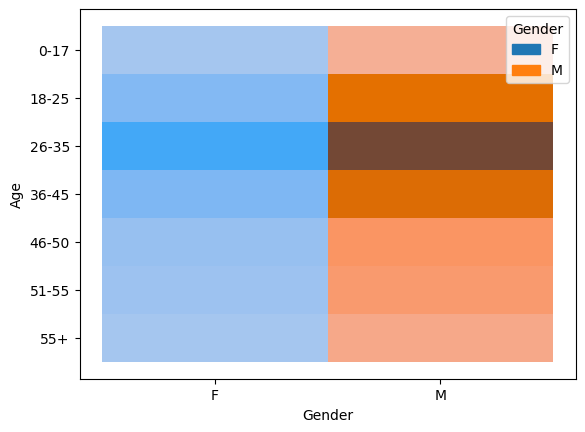

In [47]:
#Histogram
sns.histplot(y = "Age", x = "Gender" , hue = 'Gender',  data = df)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

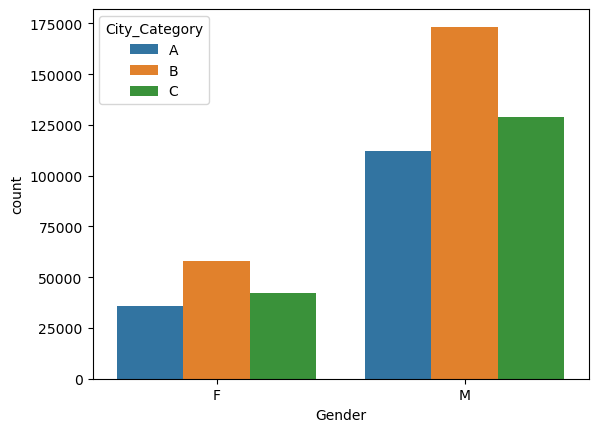

In [45]:
#Count plot
sns.countplot(data=df, x='Gender', hue = 'City_Category')
# plt.title('Color Counts')
# plt.xlabel('Color')
# plt.ylabel('Count')
# plt.show()

<Axes: xlabel='Gender', ylabel='Purchase'>

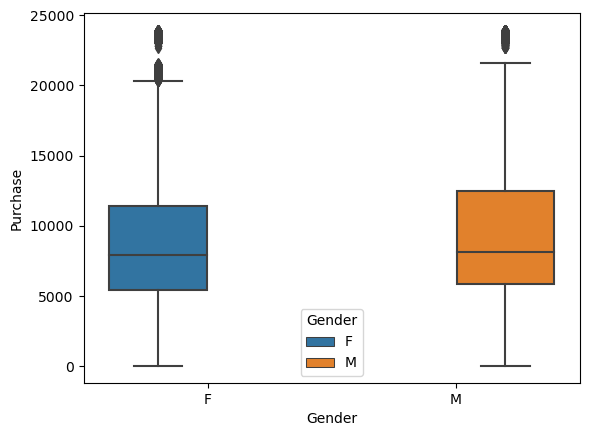

In [61]:
#Boxplot
sns.boxplot(x='Gender', y = "Purchase" , hue = "Gender", data = df)

<Axes: xlabel='Gender', ylabel='Purchase'>

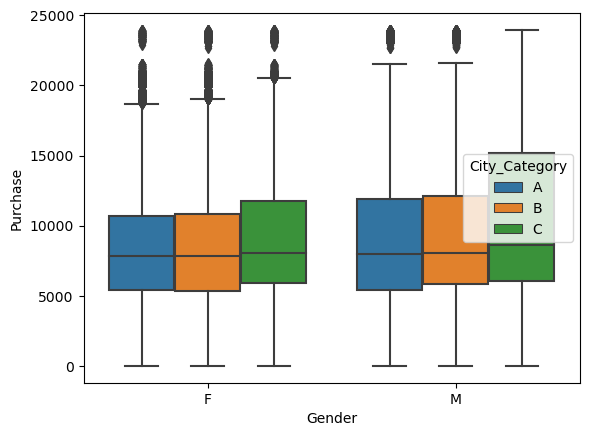

In [62]:
sns.boxplot(x='Gender', y = "Purchase" , hue = "City_Category", data = df)

<Axes: xlabel='Age', ylabel='Purchase'>

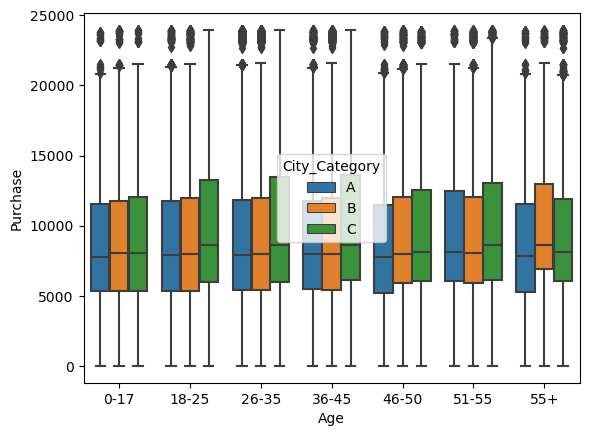

In [66]:
sns.boxplot(x='Age', y = "Purchase" , hue = "City_Category", data = df)

/var/folders/px/pgmdxsdx4pn1kz0hnhdbsg740000gn/T/ipykernel_48449/703749351.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

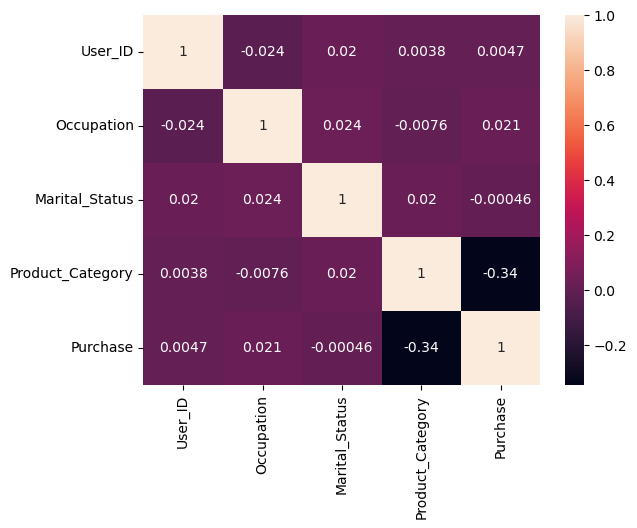

In [49]:
#Heatmap
sns.heatmap(df.corr(), annot = True)

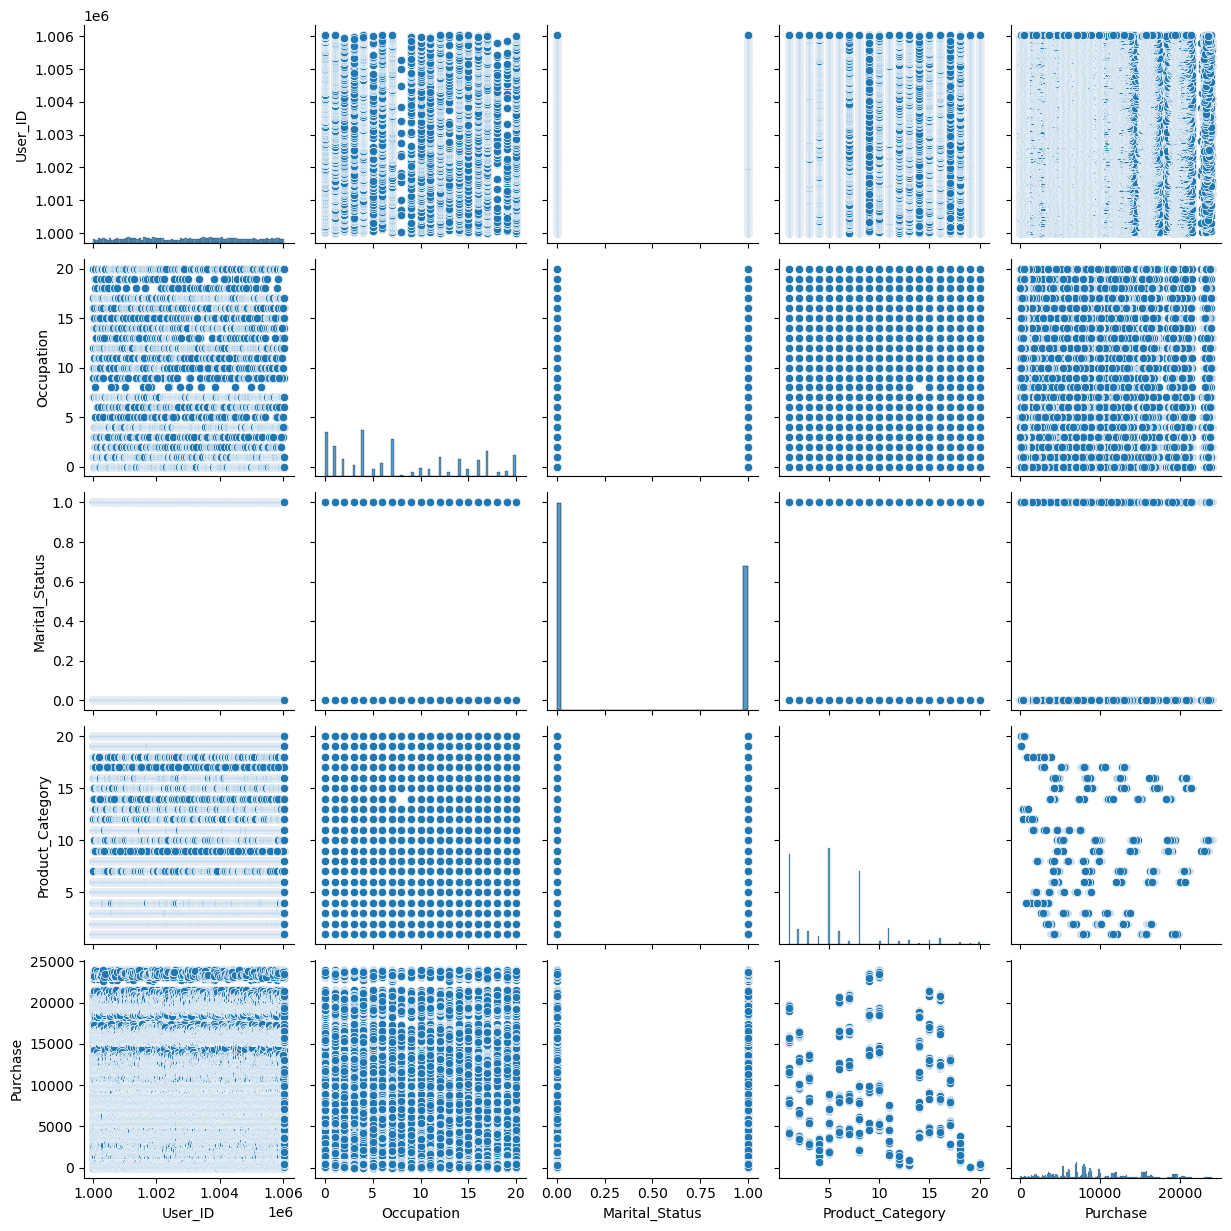

In [51]:
#pairplot 
sns.pairplot(df)

# Missing Value & Outlier Detection

In [68]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [76]:
missing_values_count = df.isnull().sum()
missing_values_count

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

<Axes: xlabel='Gender', ylabel='Purchase'>

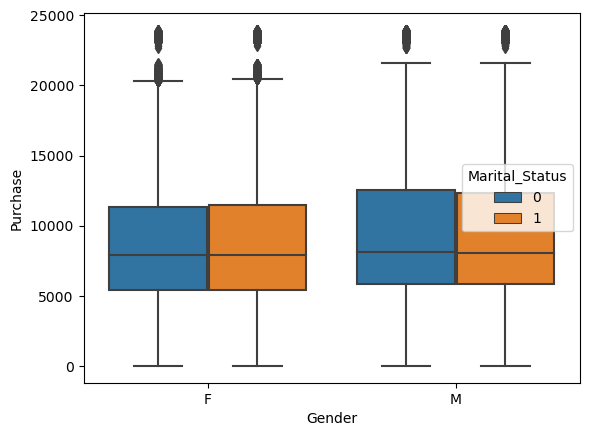

In [98]:
sns.boxplot(x = 'Gender', y = 'Purchase', hue = 'Marital_Status', data = df)

Outliers

In [103]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [105]:
numerical_columns = df.select_dtypes(include = ['number']).columns
numerical_columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [111]:
z_scores = zscore(df[numerical_columns])
z_scores.tail()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
550063,1.738930,0.754799,1.200454,3.708069,-1.771025
550064,1.740087,-1.084943,-0.833018,3.708069,-1.770428
550065,1.740666,1.061423,1.200454,3.708069,-1.817013
550066,1.741824,-1.084943,-0.833018,3.708069,-1.771623
550067,1.742403,-1.238255,1.200454,3.708069,-1.746737


In [112]:
thresold = 3
potential_outliers = (z_scores > thresold) | (z_scores < -thresold)
potential_outliers.tail()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
550063,False,False,False,True,False
550064,False,False,False,True,False
550065,False,False,False,True,False
550066,False,False,False,True,False
550067,False,False,False,True,False


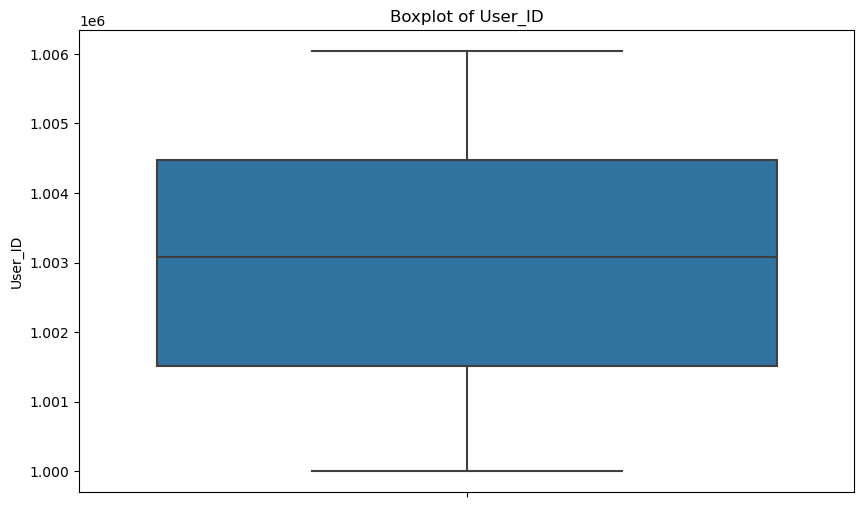

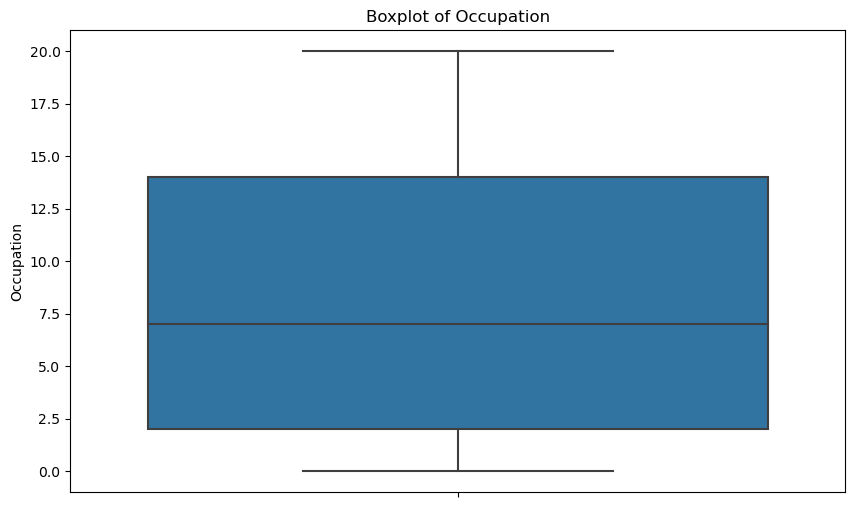

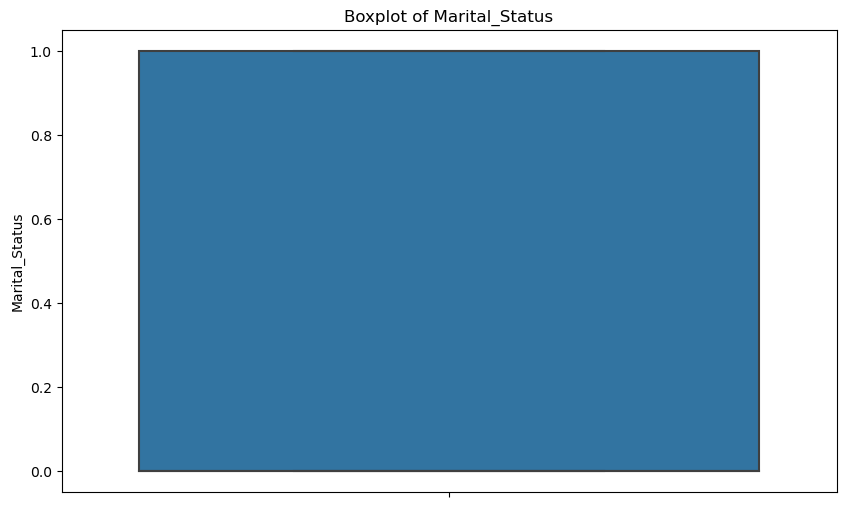

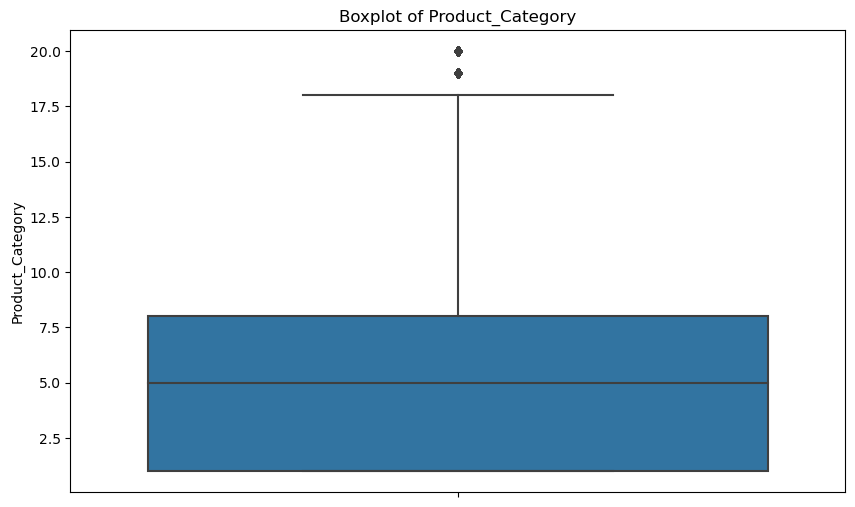

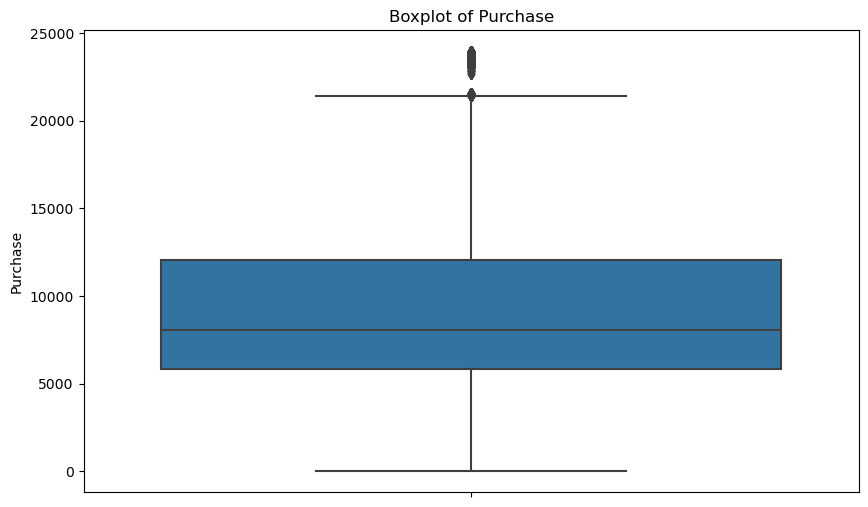

In [114]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

# Business Insights based on Non- Graphical and Visual Analysis

Comments on the range of attributes


In [118]:
for column in numerical_columns:
    attributes_range = df[column].max() - df[column].min()
    print(f"Range of {column}: {attributes_range}")

Range of User_ID: 6039
Range of Occupation: 20
Range of Marital_Status: 1
Range of Product_Category: 19
Range of Purchase: 23949


Comments on the distribution of the variables and relationship between them


In [119]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


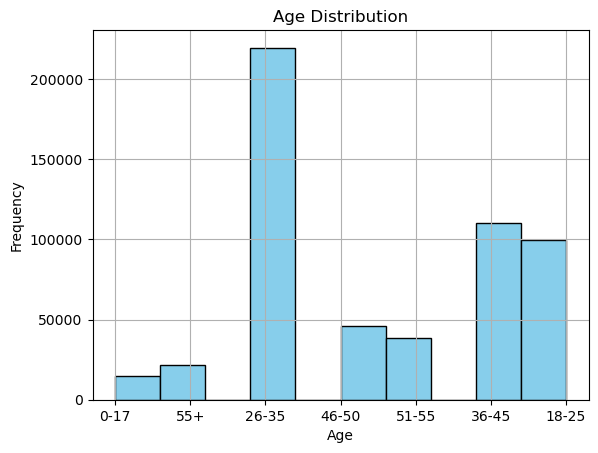

In [126]:
df['Age'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/var/folders/px/pgmdxsdx4pn1kz0hnhdbsg740000gn/T/ipykernel_48449/3164673294.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Purchase'], shade=True)


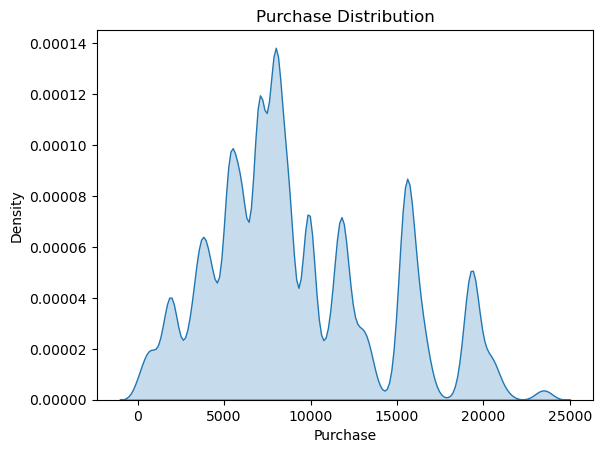

In [128]:
sns.kdeplot(data=df['Purchase'], shade=True)
plt.title('Purchase Distribution')
plt.xlabel('Purchase')
plt.ylabel('Density')
plt.show()

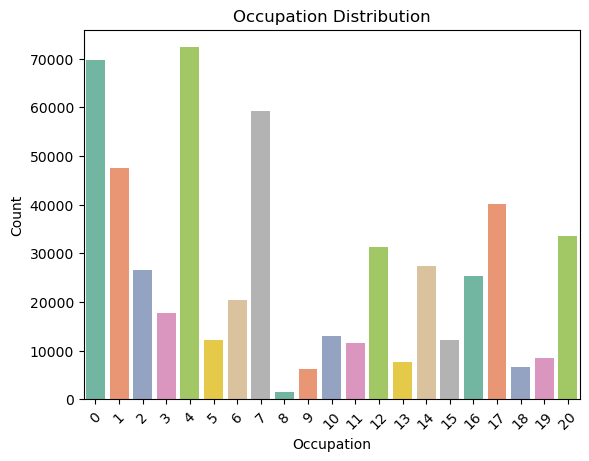

In [129]:
sns.countplot(data=df, x='Occupation', palette='Set2')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

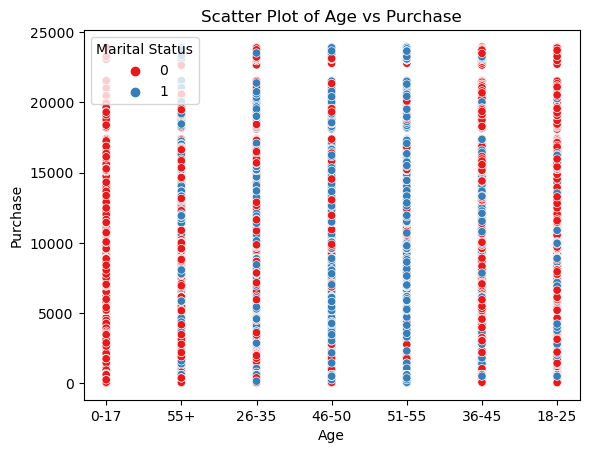

In [132]:
sns.scatterplot(data=df, x='Age', y='Purchase', hue='Marital_Status', palette='Set1')
plt.title('Scatter Plot of Age vs Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.legend(title='Marital Status')
plt.show()

Comments for each univariate and bivariate plot

1. Univariate Plots

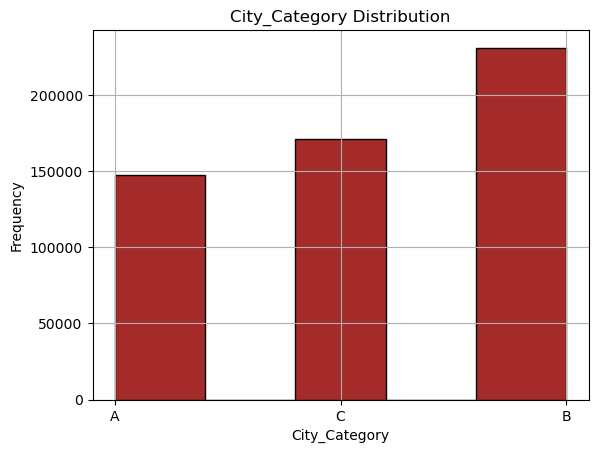

In [139]:
#histogram
df['City_Category'].hist(bins=5, color='brown', edgecolor='black')
plt.title('City_Category Distribution')
plt.xlabel('City_Category')
plt.ylabel('Frequency')
plt.show()

/var/folders/px/pgmdxsdx4pn1kz0hnhdbsg740000gn/T/ipykernel_48449/3802629334.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Purchase'], shade=True)


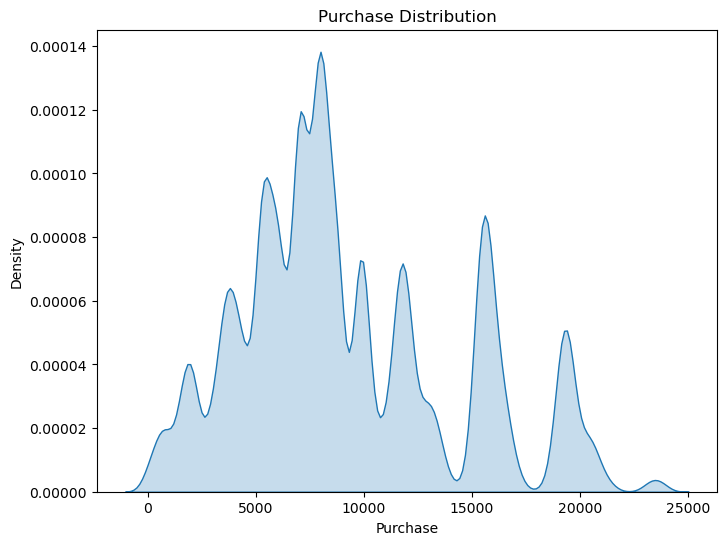

In [141]:
#KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['Purchase'], shade=True)
plt.title('Purchase Distribution')
plt.xlabel('Purchase')
plt.ylabel('Density')
plt.show()

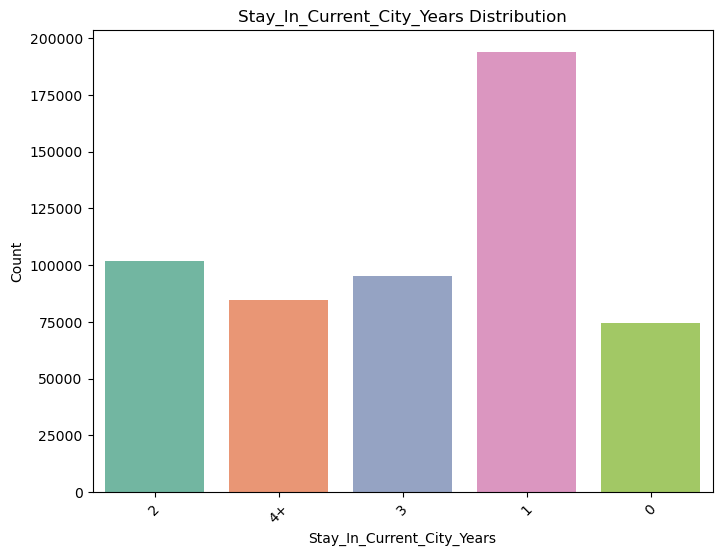

In [144]:
#Barplot 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Stay_In_Current_City_Years', palette='Set2')
plt.title('Stay_In_Current_City_Years Distribution')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


2. Bivariate Plot

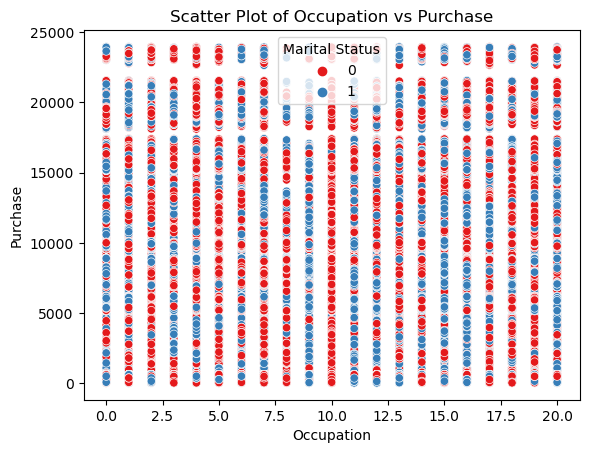

In [146]:
#Scatter Plot
sns.scatterplot(data=df, x='Occupation', y='Purchase', hue='Marital_Status', palette='Set1')
plt.title('Scatter Plot of Occupation vs Purchase')
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.legend(title='Marital Status')
plt.show()

# 4

1.Are women spending more money per transaction than men? Why or Why not?

In [148]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Gender', ylabel='Purchase'>

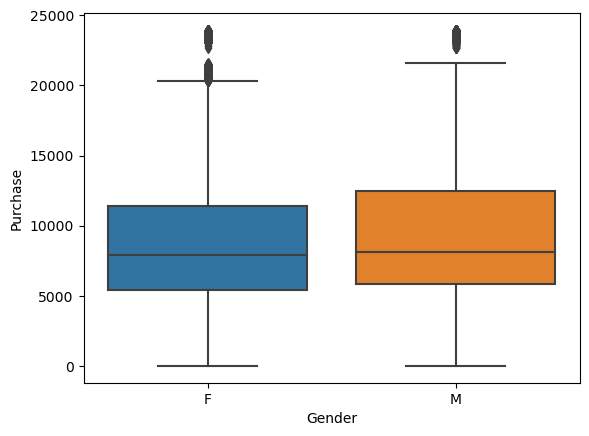

In [150]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = df)

In [158]:
def CLT(population, sample_size, num_of_samples, plot = True):
    sample_means = []
    
    for i in range(num_of_samples):
        sample = np.random.choice(population, size = sample_size)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
        
    if plot:
        plt.figure(figsize=(10,6))
        plt.hist(sample_means, bins = 20, color = 'skyblue', edgecolor = 'black')
        plt.title(f'Distribution of Sample Means (Sample Size: {sample_size})')
        plt.xlabel('Sample Mean')
        plt.ylabel('Frequency')
        plt.show()
        
    return sample_means
    

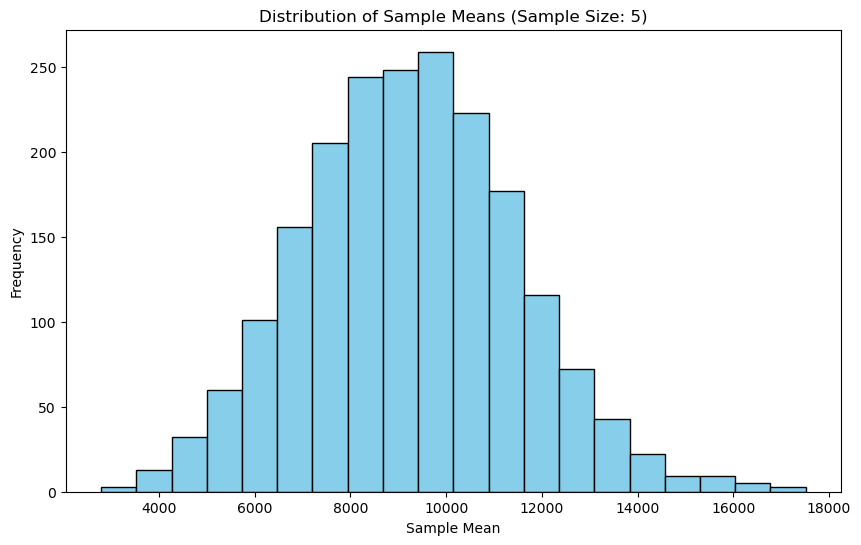

In [159]:
population = df['Purchase']
sample_size = 5
num_of_samples = 2000
sample_means = CLT(population, sample_size, num_of_samples)

In [179]:
women_purchase = df[df['Gender']=='F']['Purchase']
x = np.sum(women_purchase)

In [180]:
men_purchase = df[df['Gender']=='M']['Purchase']
y = np.sum(men_purchase)

In [181]:
x > y

False

In [187]:
#H0: There is no significant difference in the mean amount spent per transaction between women and men.
#Ha: Women are spending more money per transaction than men.

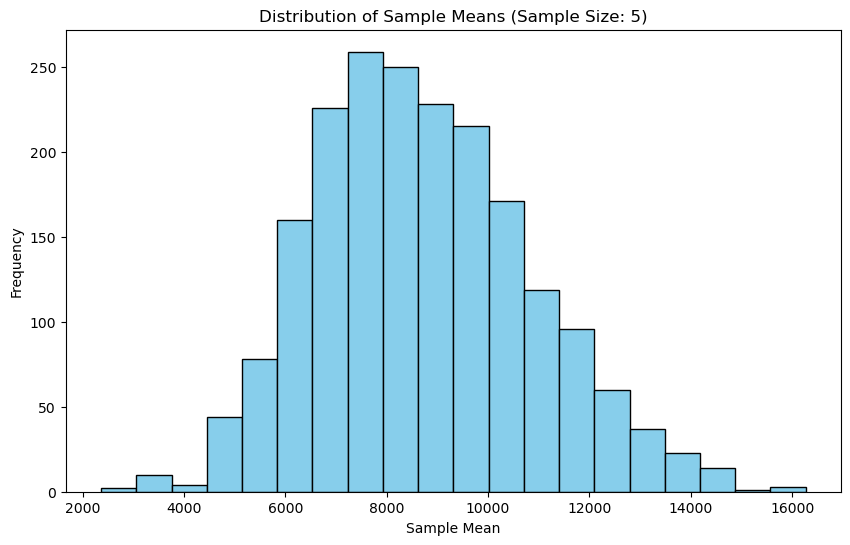

In [188]:
#for women
sample_size = 5
num_of_samples = 2000
sample_means = CLT(women_purchase, sample_size, num_of_samples)

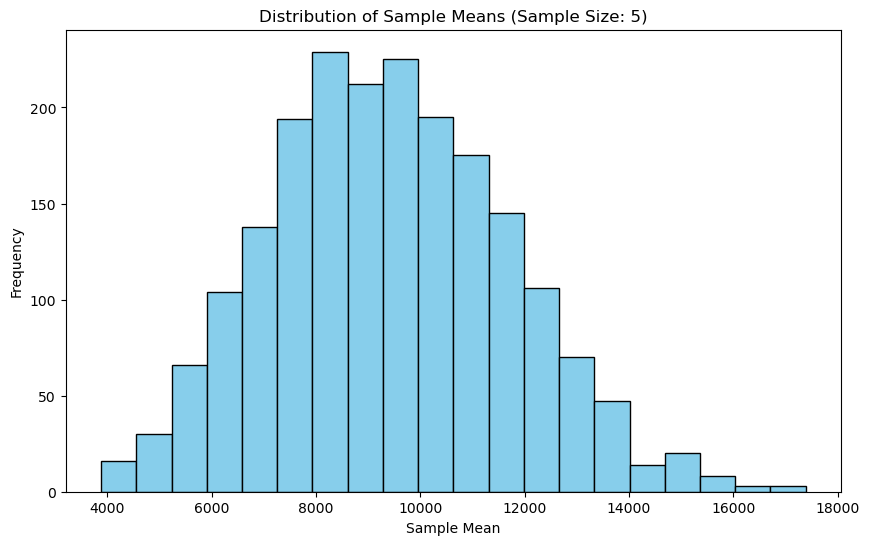

In [189]:
#for men
sample_size = 5
num_of_samples = 2000
sample_means = CLT(men_purchase, sample_size, num_of_samples)

In [204]:
sample_women_mean = np.mean(women_purchase)
sample_women_mean

8734.565765155476

In [205]:
sample_men_mean = np.mean(men_purchase)
sample_men_mean

9437.526040472265

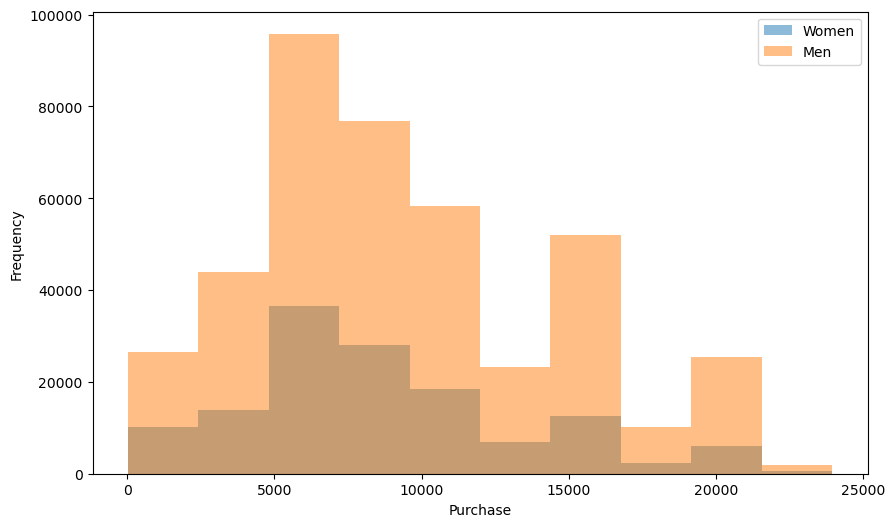

In [210]:
plt.figure(figsize=(10, 6))
plt.hist(women_purchase, bins=10, alpha=0.5, label='Women')
plt.hist(men_purchase, bins=10, alpha=0.5, label='Men')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [214]:
#There are two sample so we will use two sample ttest.
t_stats, p_value = ttest_ind(women_purchase, men_purchase)
t_stats, p_value

(-44.837957934353966, 0.0)

In [215]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Women are spending more money per transaction than men.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

Reject the null hypothesis. Women are spending more money per transaction than men.


Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [221]:
sample_women_mean = women_purchase.mean()
sample_men_mean = men_purchase.mean()

In [217]:
std_dev_female = women_purchase.std()
std_dev_male = men_purchase.std()

9437.526040472265

In [223]:
sample_size_female = len(women_purchase)
sample_size_male = len(men_purchase)

In [224]:
std_err_female = std_dev_female / np.sqrt(sample_size_female)
std_err_male = std_dev_male / np.sqrt(sample_size_male)

In [226]:
confidence_level = 0.95 
alpha = 0.05

7.91167247562093

In [227]:
#degree of freedom (n-1)
df_female = sample_size_female - 1
df_male = sample_size_male - 1

In [230]:
#t-value for CI
t_value_female = t.ppf(1 - alpha / 2, df=df_female)
t_value_male = t.ppf(1 - alpha / 2, df=df_male)

In [232]:
# Calculate confidence intervals
ci_lower_female = sample_women_mean - t_value_female * std_err_female
ci_upper_female = sample_women_mean + t_value_female * std_err_female

ci_lower_male = sample_men_mean - t_value_male * std_err_male
ci_upper_male = sample_men_mean + t_value_male * std_err_male

print("Confidence Interval for Female Customers:", (ci_lower_female, ci_upper_female))
print("Confidence Interval for Male Customers:", (ci_lower_male, ci_upper_male))

Confidence Interval for Female Customers: (8709.21132117373, 8759.92020913722)
Confidence Interval for Male Customers: (9422.019402055814, 9453.032678888716)


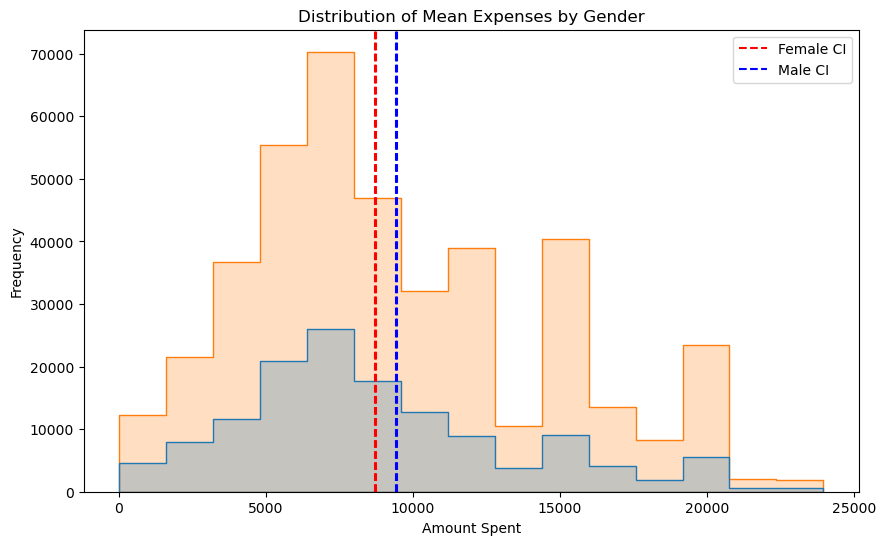

In [234]:
plt.figure(figsize=(10, 6))

# Histograms
sns.histplot(data=df, x='Purchase', hue='Gender', element='step', common_norm=False, bins=15)

# Confidence intervals
plt.axvline(x=ci_lower_female, color='r', linestyle='--', label='Female CI')
plt.axvline(x=ci_upper_female, color='r', linestyle='--')
plt.axvline(x=ci_lower_male, color='b', linestyle='--', label='Male CI')
plt.axvline(x=ci_upper_male, color='b', linestyle='--')

plt.title('Distribution of Mean Expenses by Gender')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

There is evidence to suggest that the average spending of males and females is different, and this difference is statistically significant at the chosen confidence level.

Walmart may consider these analysis:

Marketing Strategies: Walmart could tailor marketing campaigns or promotions to specific gender groups based on their spending patterns. For example, if females are spending significantly more, targeted advertising or incentives could be offered to attract more female customers.

Product Placement: Walmart could adjust the placement and promotion of products to align with the preferences of each gender, enhancing their shopping experience and potentially increasing spending.

Customer Experience: Understanding the differences in spending behavior could lead to improved customer experiences. For instance, Walmart could optimize store layouts or provide special services that cater to the identified preferences of each gender.

# Results when the same activity is performed for Married vs Unmarried

In [235]:
#H0: There is no significant difference in the mean amount spent per transaction between married and unmarried.
#Ha: Married are more tend to purchase than unmarried.

In [237]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [242]:
unmarried_purchase = df[df['Marital_Status']==0]['Purchase']
married_purchase = df[df['Marital_Status']==1]['Purchase']

In [243]:
t_stats , p_value = ttest_ind(unmarried_purchase, married_purchase)
t_stats , p_value

(0.3436698055440526, 0.7310947525758316)

In [244]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0, Married are more tend to purchase than unmarried.")
else:
    print("There is no significant difference in the mean amount spent per transaction between married and unmarried.")

There is no significant difference in the mean amount spent per transaction between married and unmarried.


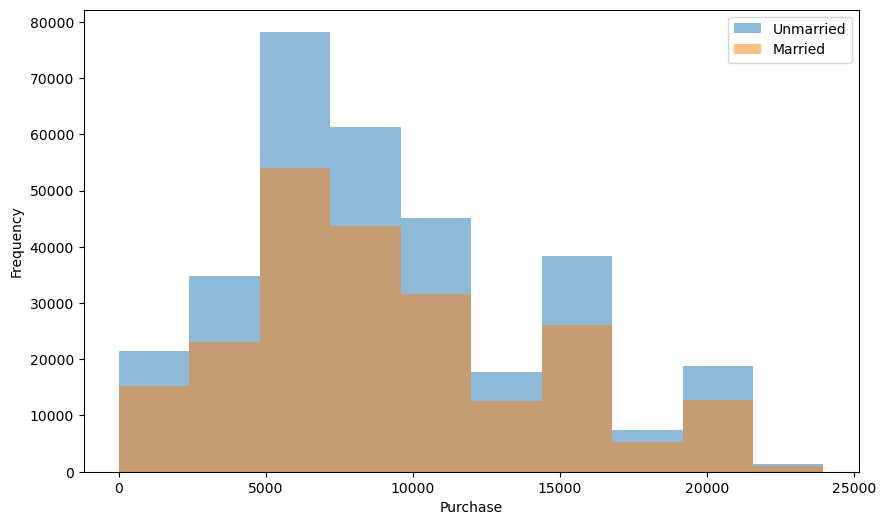

In [246]:
plt.figure(figsize=(10, 6))
plt.hist(unmarried_purchase, bins=10, alpha=0.5, label='Unmarried')
plt.hist(married_purchase, bins=10, alpha=0.5, label='Married')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Results when the same activity is performed for Age

In [250]:
#H0: There is no significant difference in the mean amount spent per transaction for age.
#Ha: There is a relation between age and purchase.

For Age,We will try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years

In [275]:
age1 = df[df['Age']=='0-17']['Purchase']
age2 = df[df['Age']=='18-25']['Purchase']
age3 = df[df['Age']=='26-35']['Purchase']
age4 = df[df['Age']=='36-50']['Purchase']
age5 = df[df['Age']=='55+']['Purchase']

In [276]:
first_mean = age1.mean()
second_mean = age2.mean()
third_mean = age3.mean()
forth_mean = age4.mean()
fifth_mean = age5.mean()

In [271]:
#for 1 sample data we will use ttest_1samp
t_stats, p_value = ttest_1samp(age1, first_mean)
t_stats, p_value

(0.0, 1.0)

In [273]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Keep the null hypothesis")

Keep the null hypothesis


In [283]:
t_stats, p_value = ttest_1samp(age2, second_mean)
t_stats, p_value

(0.0, 1.0)

In [284]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Keep the null hypothesis")

Keep the null hypothesis


In [285]:
t_stats, p_value = ttest_1samp(age3, third_mean)
t_stats, p_value

(0.0, 1.0)

In [286]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Keep the null hypothesis")

Keep the null hypothesis


In [289]:
t_stats, p_value = ttest_1samp(age4, forth_mean)
t_stats, p_value

(nan, nan)

In [290]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Keep the null hypothesis")

Keep the null hypothesis


In [292]:
t_stats, p_value = ttest_1samp(age5, fifth_mean)
t_stats, p_value

(0.0, 1.0)

In [293]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Keep the null hypothesis")

Keep the null hypothesis


# Illustrate the insights based on exploration and CLT

Comments on the distribution of the variables and relationship between them

Comments for each univariate and bivariate plots


Comments on different variables when generalizing it for Population

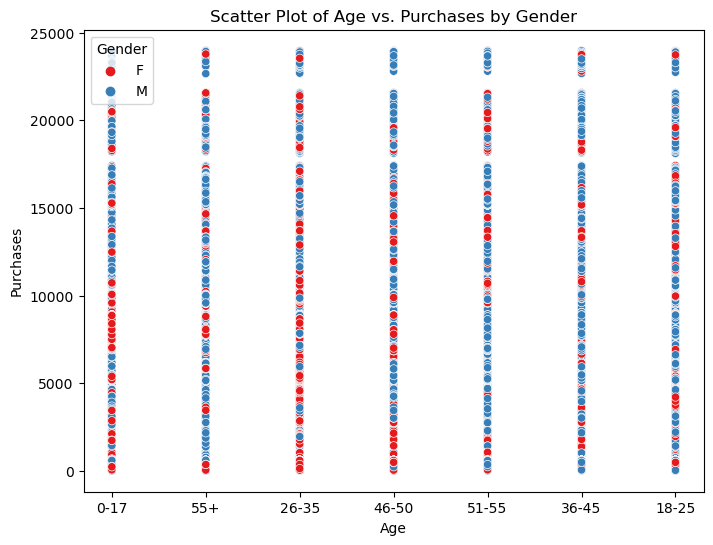

In [294]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Purchase', hue='Gender', palette='Set1')
plt.title('Scatter Plot of Age vs. Purchases by Gender')
plt.xlabel('Age')
plt.ylabel('Purchases')
plt.legend(title='Gender')
plt.show()

Distribution of Customer Ages:
The distribution of customer ages appears to be roughly uniform across age groups, as shown by the histogram. The data is divided into five age groups: "18-24," "25-34," "35-44," "45-54," and "55+." This suggests that the sample includes a relatively even representation of customers from different age ranges

The scatter plot of age versus amount spent, color-coded by gender, suggests some interesting trends. There appears to be a general positive correlation between age and amount spent.However, this correlation may not be strong. Additionally, there are variations within each age group, indicating that age alone may not be the only factor influencing spending behavior.

# Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

Targeted Marketing by Age Group:

Action: Develop marketing campaigns tailored to different age groups.
Why: Older customers tend to spend more. Create promotions or offers that resonate with specific age segments to attract more customers.

Promote Gender-Specific Offers:

Action: Design promotions that cater to the spending patterns of each gender.
Why: Gender influences spending behavior. Customize advertisements or deals to match what male and female customers prefer.

Enhance Store Layout for Different Age Groups:

Action: Optimize store layouts based on age-related preferences.
Why: Older and younger customers may have different shopping preferences. Arrange products and displays accordingly to improve the shopping experience.

Monitor Customer Satisfaction by Age:

Action: Gather feedback from different age groups and make improvements.
Why: Satisfaction may vary by age. Collect insights to enhance services or resolve issues specific to each age category.

Promote Cross-Selling to Different Age Segments:

Action: Suggest complementary products to customers based on their age.
Why: Knowing their age can help recommend items that align with their preferences, leading to increased sales.

Flexible Staffing During Peak Age Periods:

Action: Adjust staffing levels based on the busiest age periods.
Why: Allocate resources effectively to meet the demands of specific age groups during peak hours.

Test New Products with Specific Age Groups:

Action: Introduce new products to target age segments first.
Why: Different age groups may respond differently to new products. Test the waters with segments likely to be more receptive.

Improve Checkout Process for All Ages:

Action: Streamline the checkout process for a smoother experience.
Why: A seamless checkout benefits customers of all ages, enhancing overall satisfaction.